In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from scipy.stats import mannwhitneyu


In [2]:
education = pd.read_csv("Education - EducationReport (1) (1).csv")
education.dropna(axis='rows')
education.head()


,Unnamed: 0,ID,County,State,Urban,1970,1980,1990,2000,2019
0,2015-2019,1001,Autauga,AL,2.0,0.06,0.12,0.15,0.18,0.27
1,2015-2019,1003,Baldwin,AL,3.0,0.07,0.12,0.17,0.23,0.32
2,2015-2019,1005,Barbour,AL,6.0,0.07,0.09,0.12,0.11,0.12
3,2015-2019,1007,Bibb,AL,1.0,0.04,0.05,0.05,0.07,0.10
4,2015-2019,1009,Blount,AL,1.0,0.03,0.05,0.07,0.10,0.13


In [3]:
education.describe()

,ID,Urban,1970,1980,1990,2000,2019
count,3150.000000,3144.000000,3124.000000,3132.000000,3137.00000,3140.000000,3141.000000
mean,30357.680000,5.010496,0.073854,0.115172,0.13562,0.165685,0.220032
std,15196.317985,2.708130,0.039748,0.054530,0.06567,0.077995,0.095490
min,1001.000000,1.000000,0.000000,0.020000,0.04000,0.050000,0.000000
25%,18171.500000,2.000000,0.050000,0.080000,0.09000,0.110000,0.150000
50%,29174.000000,6.000000,0.060000,0.100000,0.12000,0.150000,0.200000
75%,45082.500000,7.000000,0.090000,0.130000,0.16000,0.190000,0.260000
max,56045.000000,9.000000,0.390000,0.480000,0.53000,0.640000,0.780000


Text(0.5, 1.0, 'Urban Index Distribution')

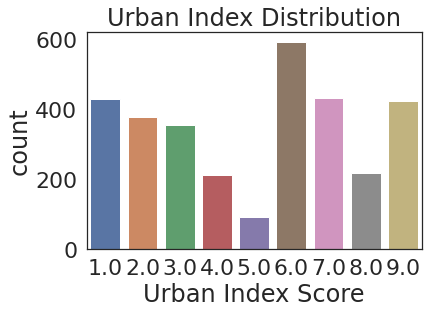

In [4]:
p = sns.countplot("Urban",data =education)
p.set_xlabel("Urban Index Score")
p.set_title("Urban Index Distribution")

In [5]:
part = education['State'].unique().tolist()
corr_dict = {}
for i in part:
    df = education[(education.State == i)]
    #sns.barplot(x="Urban",y="2019",data = df)
    column_1 = df['Urban']
    column_2 = df["2019"]
    correlation = column_1.corr(column_2)
    if(abs(correlation)>.5):
        corr_dict[i] = correlation
corr_dict


{'AZ': -0.644198450561376,
 'DE': -0.9819805060619659,
 'FL': -0.693125708919179,
 'IL': -0.6081781815286073,
 'IA': -0.5025715436322338,
 'KY': -0.5247632846113541,
 'LA': -0.5023898833058986,
 'MN': -0.5398804218671762,
 'MO': -0.5126084092310675,
 'NV': -0.7154305124884399,
 'NH': -0.6866602359893941,
 'OH': -0.6155267375487595,
 'OR': -0.5375637988389662,
 'PA': -0.6332817560391005,
 'SC': -0.5221860133909334,
 'UT': -0.5076112874167206,
 'VA': -0.50102078748295,
 'WI': -0.559527667738753}

Text(0.5, 1.0, 'Singifcant Urban College Correlations')

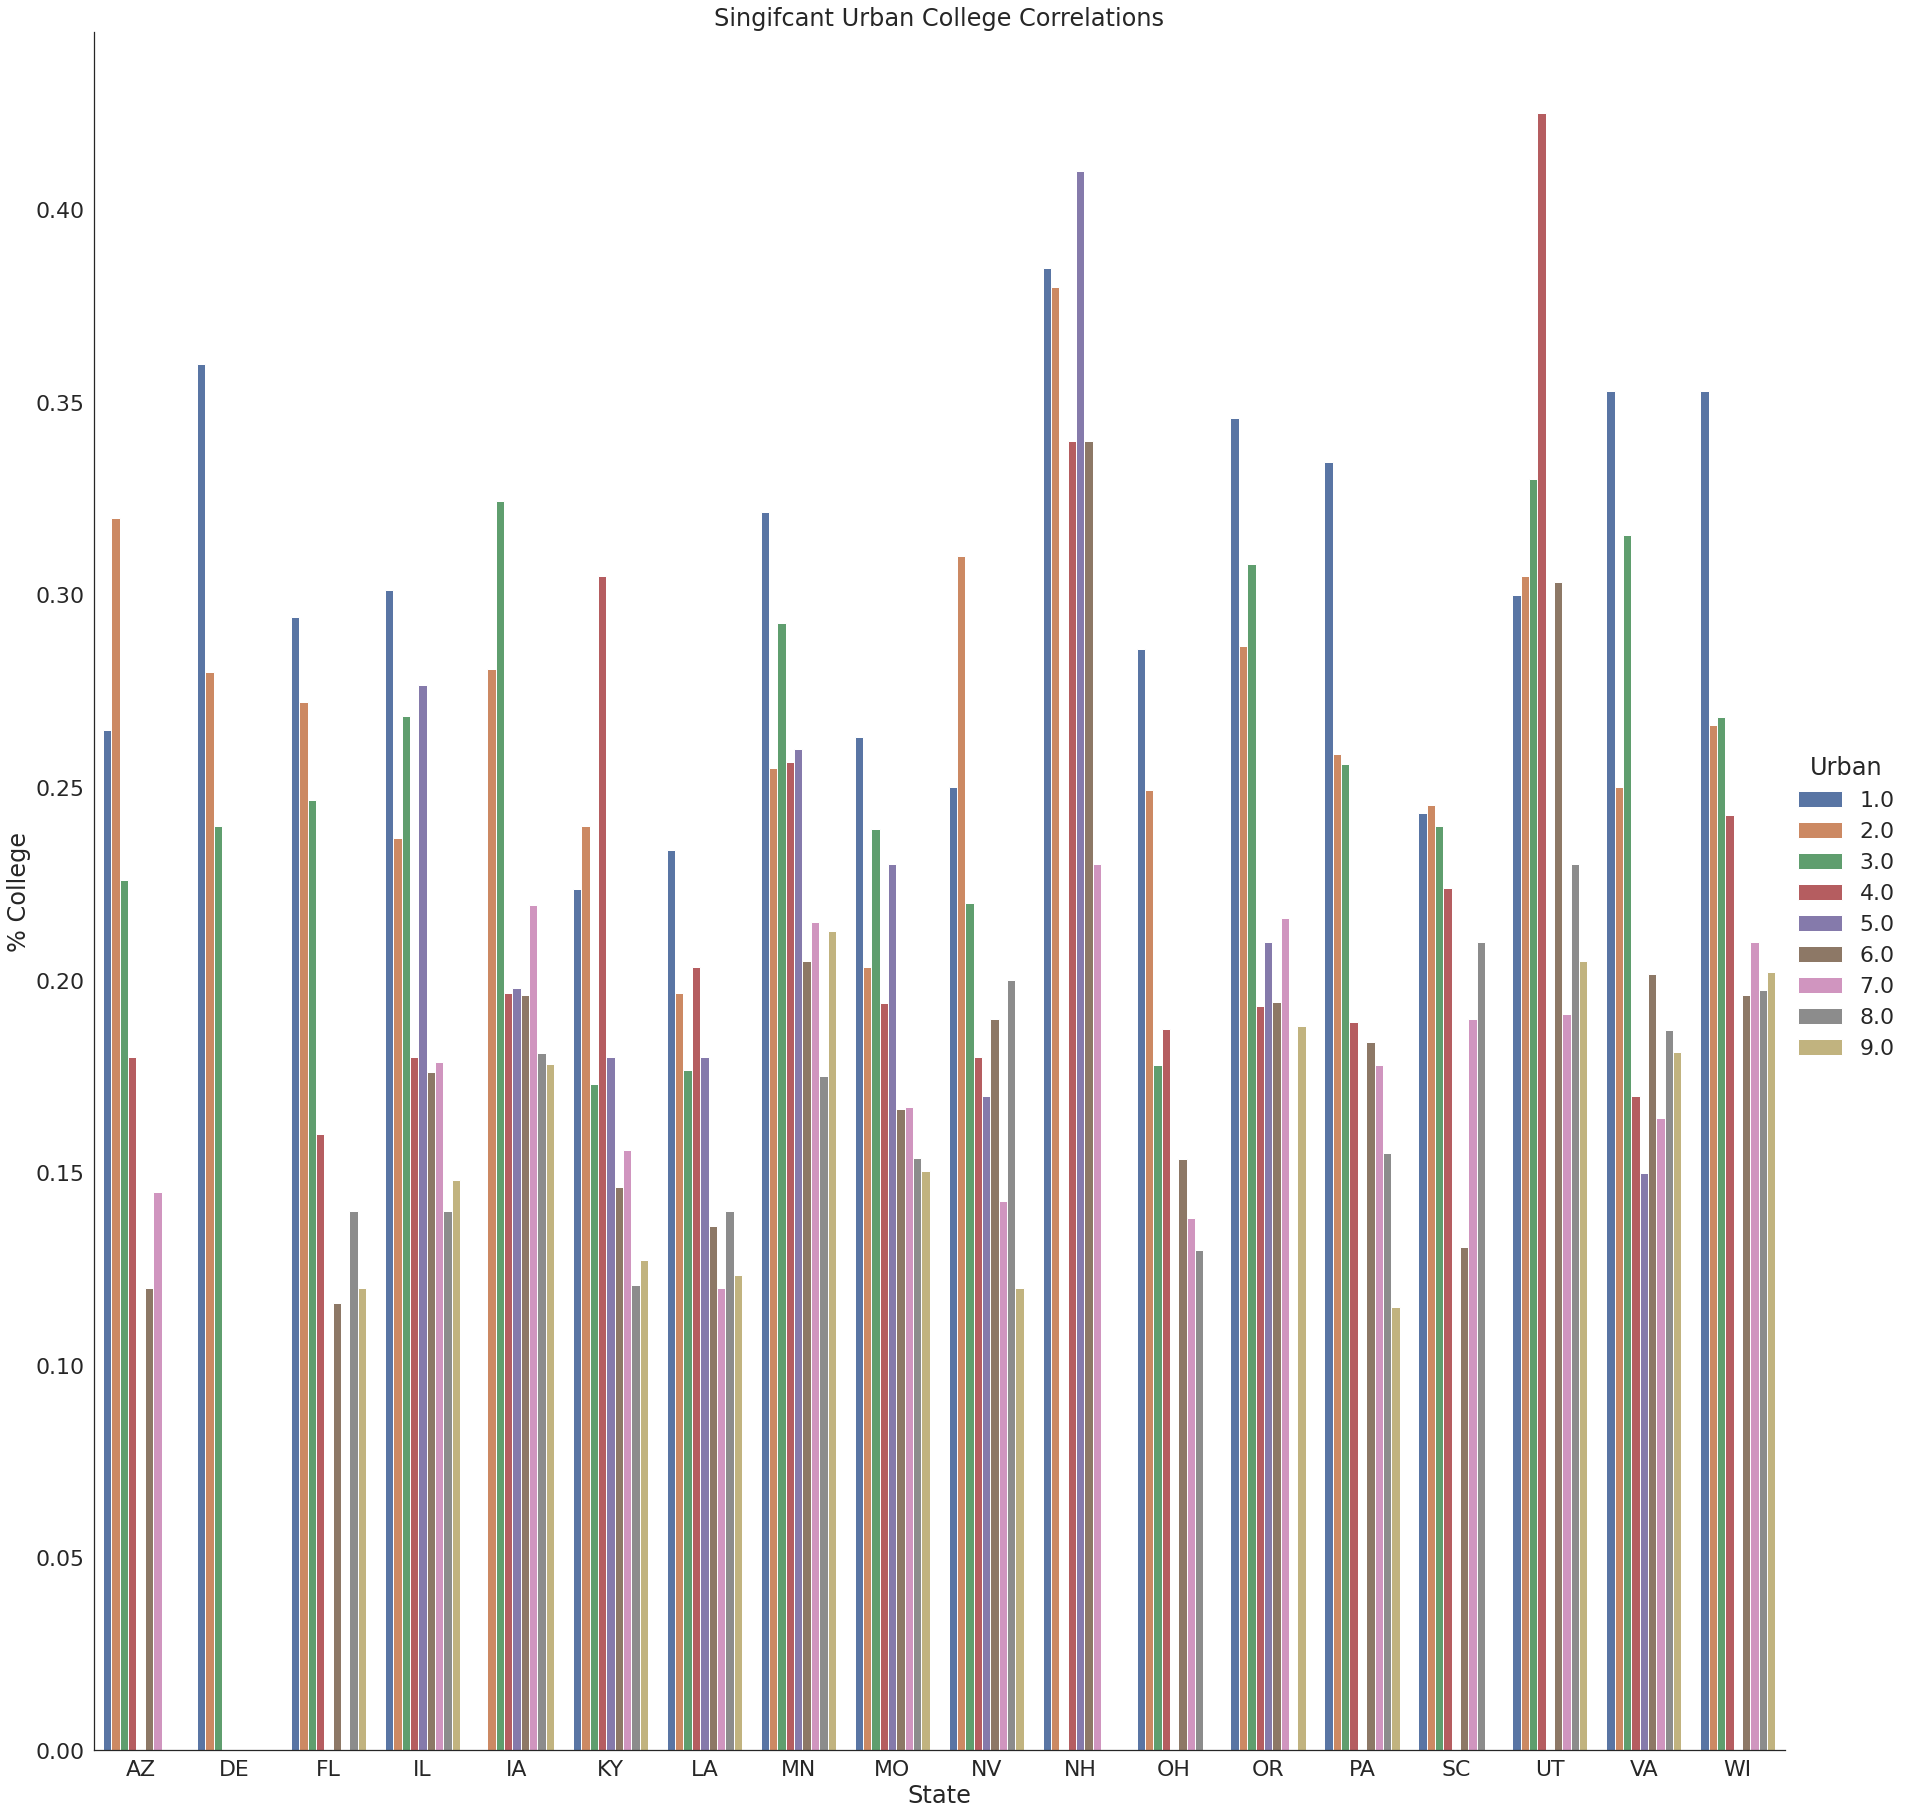

In [6]:
listy = corr_dict.keys()
df2 = education[education['State'].isin(listy)]
df2
g = sns.catplot(
    data=df2, kind="bar",
    x="State", y="2019",hue = 'Urban',height=25,ci = None)

plt.ylabel("% College")
plt.title("Singifcant Urban College Correlations")
    

Text(0.5, 1.0, 'Singifcant Urban College Correlations')

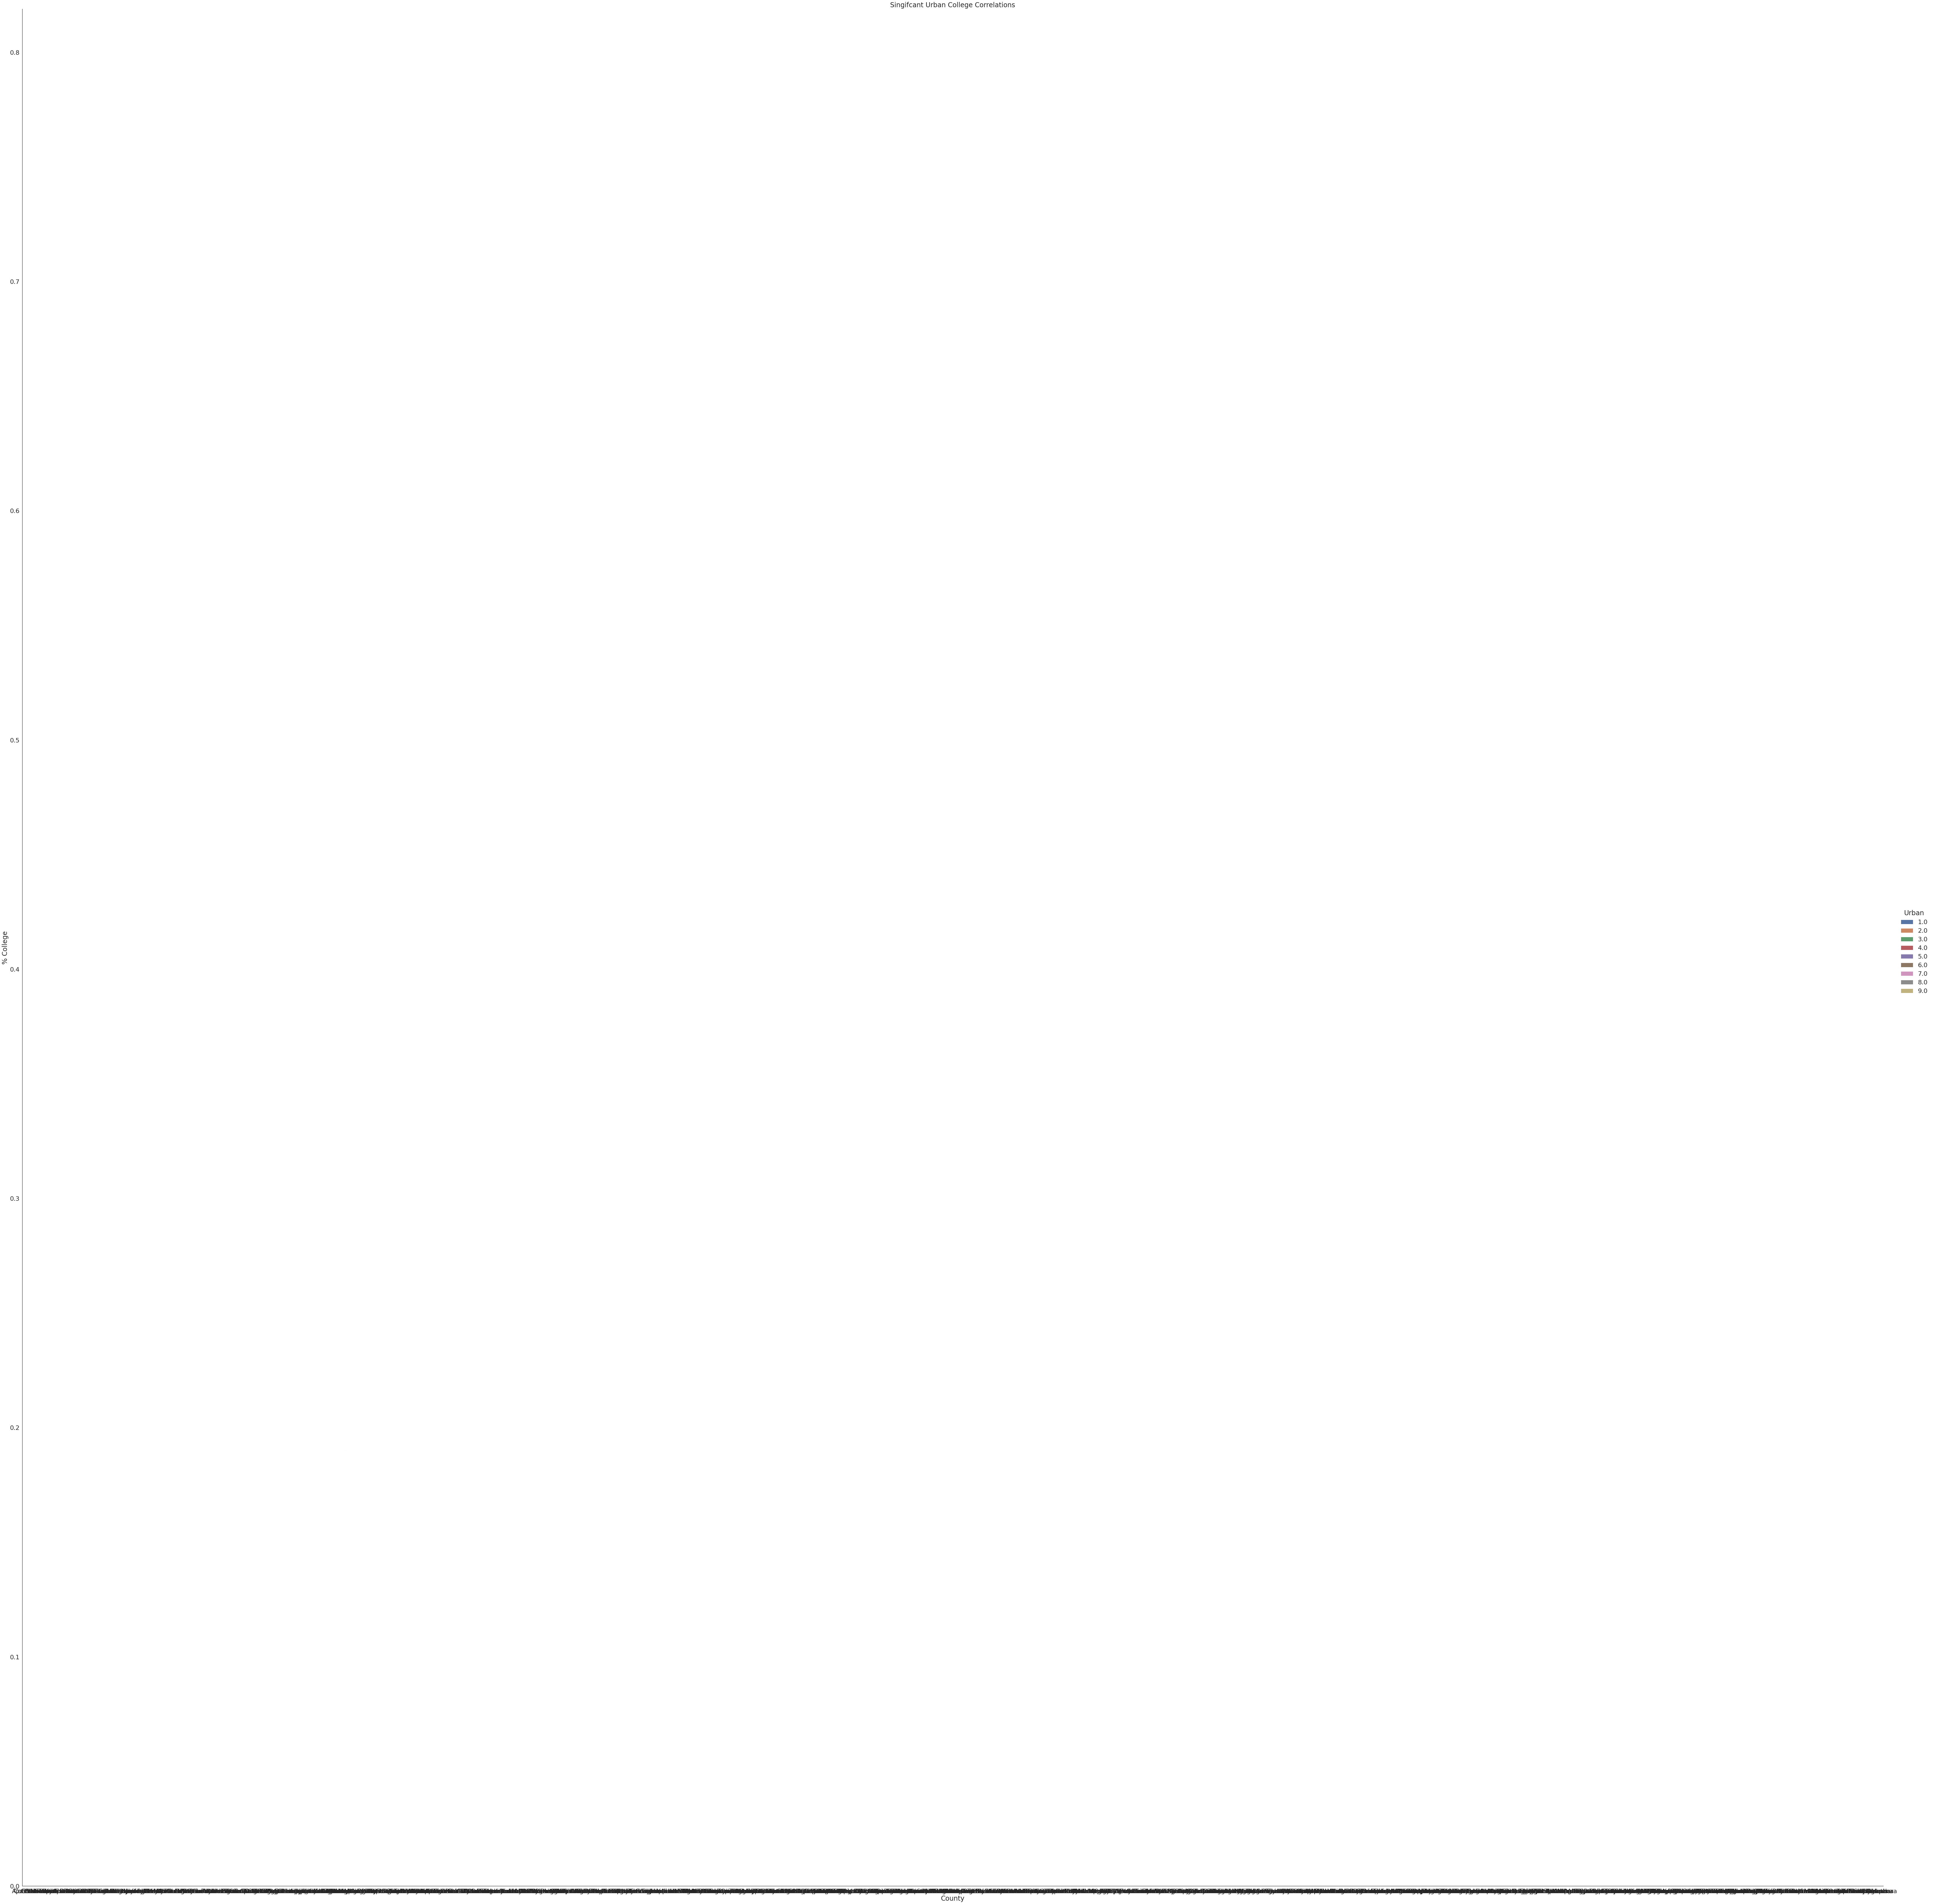

In [7]:

df2 = education[education['State'].isin(listy)]

g = sns.catplot(
    data=df2, kind="bar",
    x="County", y="2019",height=95,hue = 'Urban', ci = None)

plt.ylabel("% College")
plt.title("Singifcant Urban College Correlations")
    

Text(0.5, 1.0, 'Least College Educated')

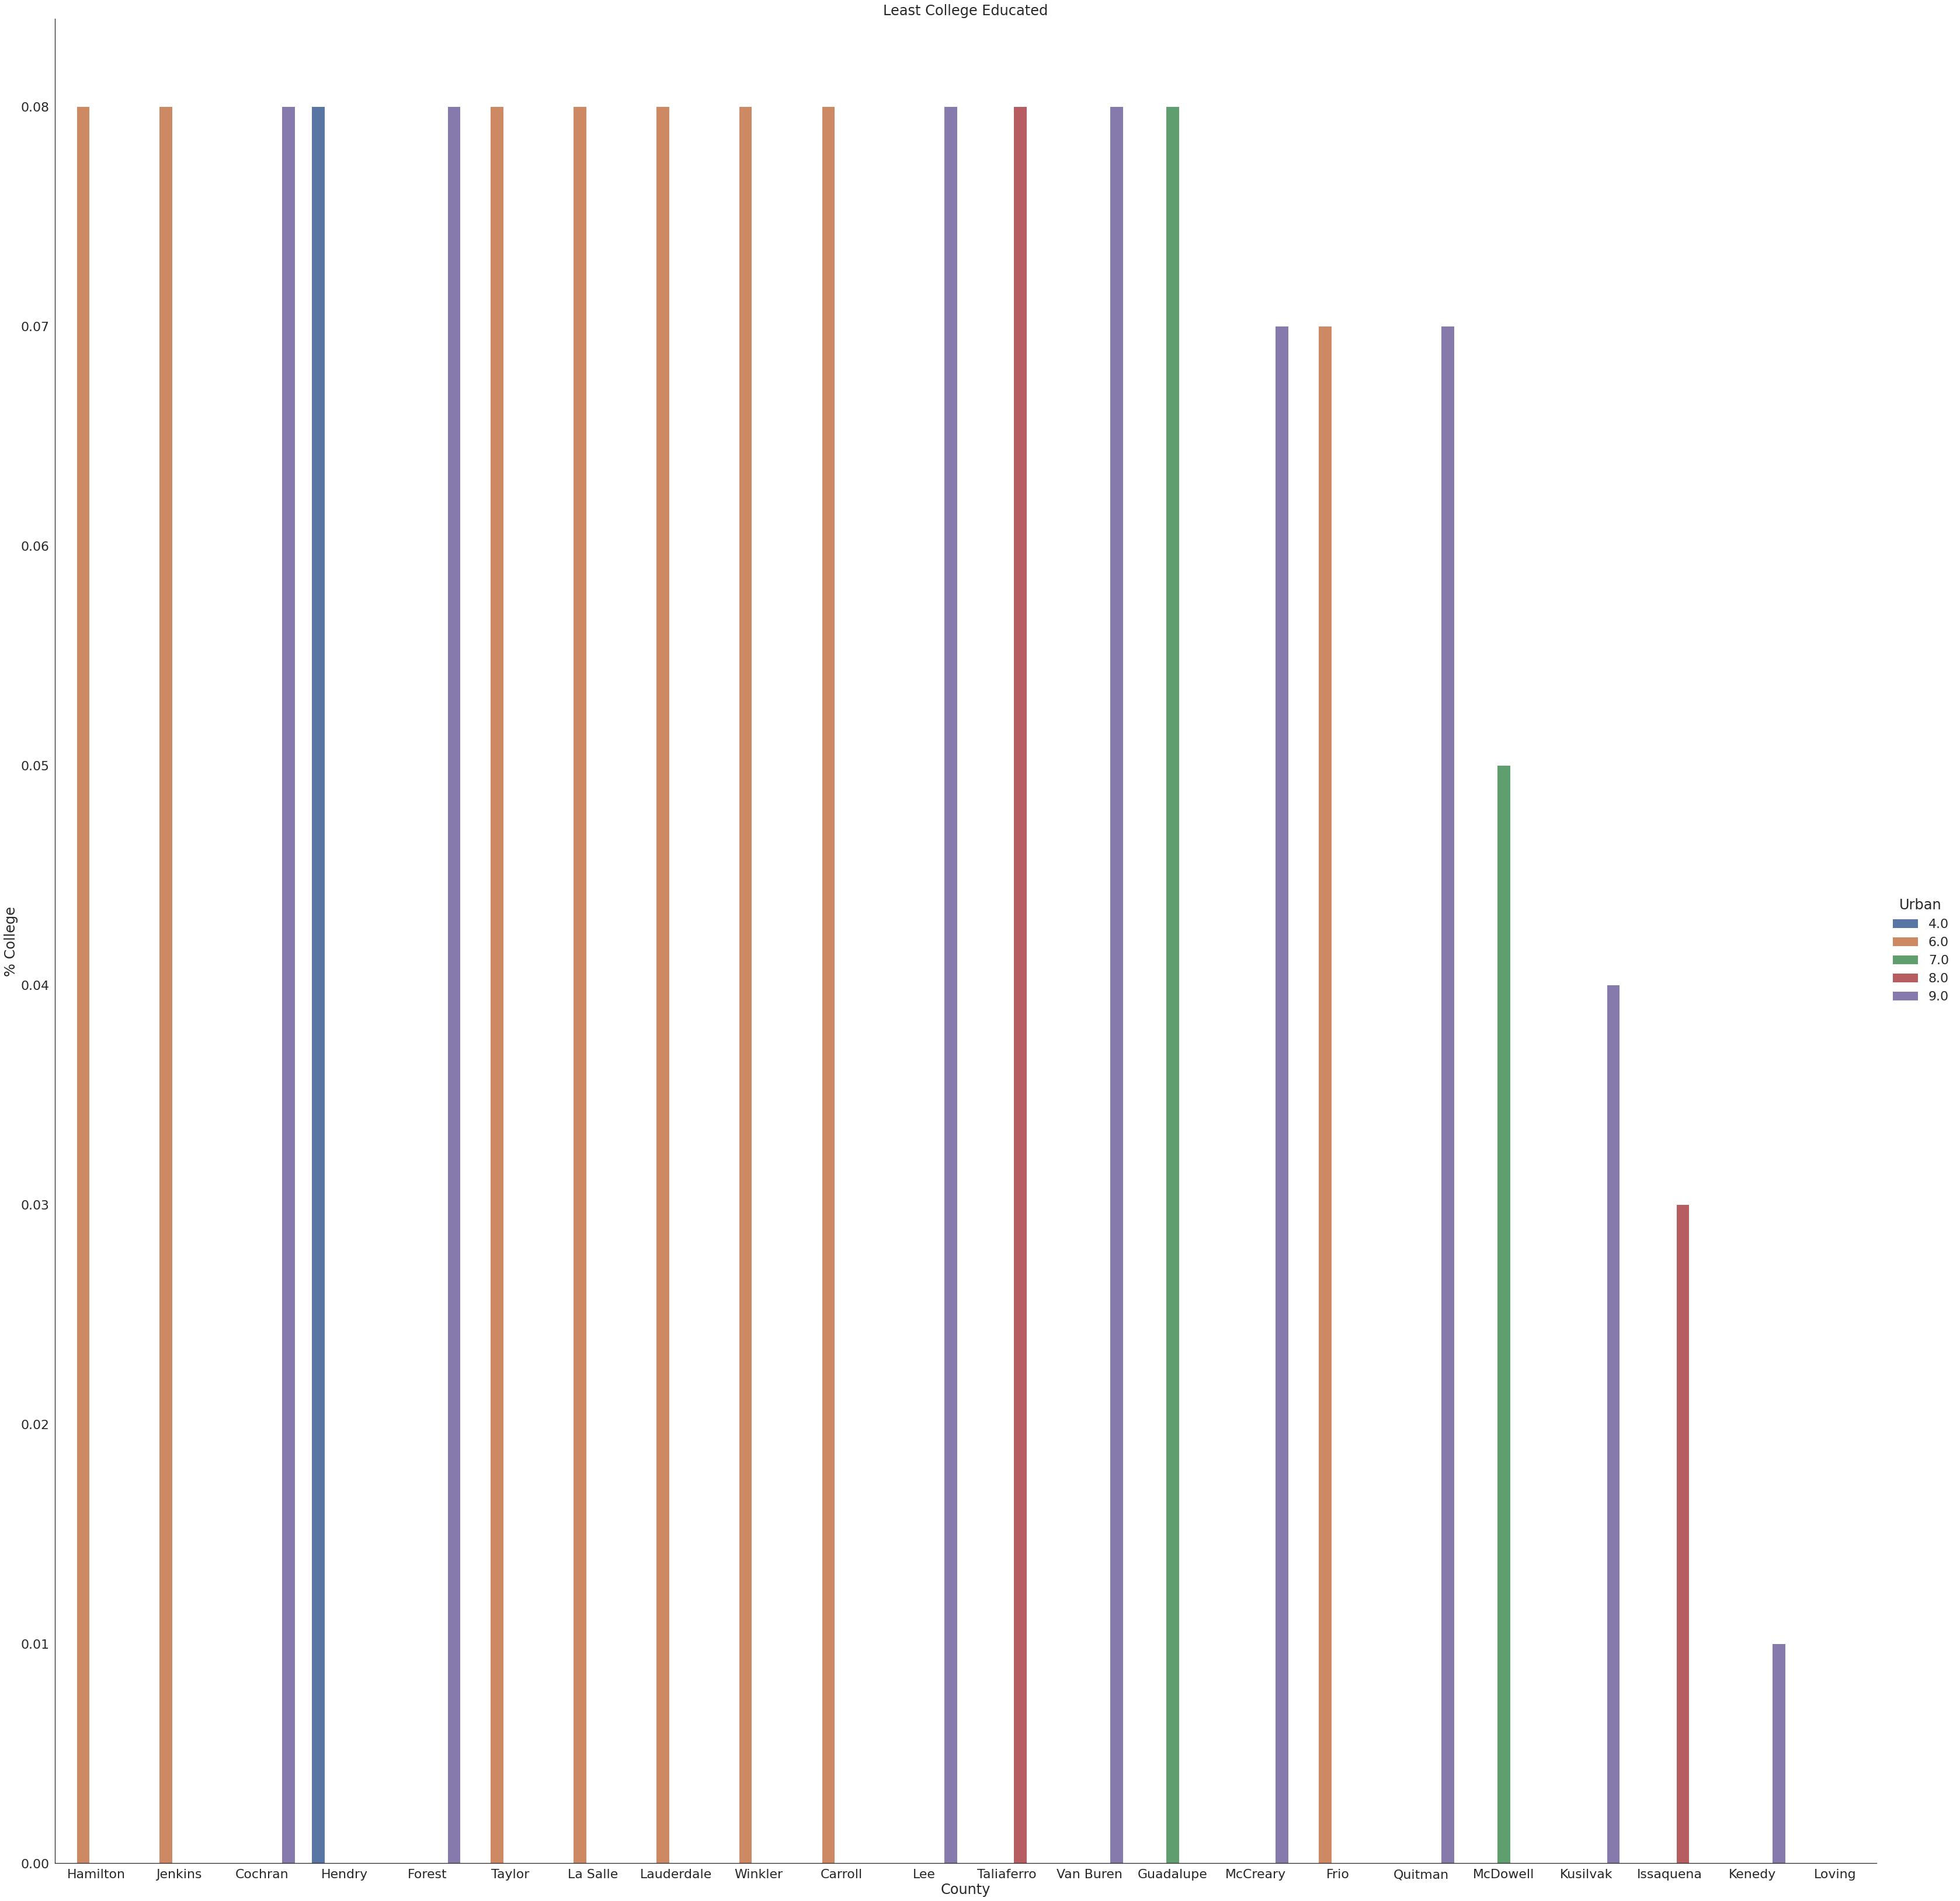

In [8]:
df = education.sort_values(by=['2019'],ascending=False)
df = df[df['2019']<=.08]
part = df['County'].unique().tolist()
g = sns.catplot(
    data=df, kind="bar",
    x="County", y="2019",height=45,hue = 'Urban', ci = None)
plt.ylabel("% College")
plt.title("Least College Educated")


Text(0.5, 1.0, 'Most College Educated')

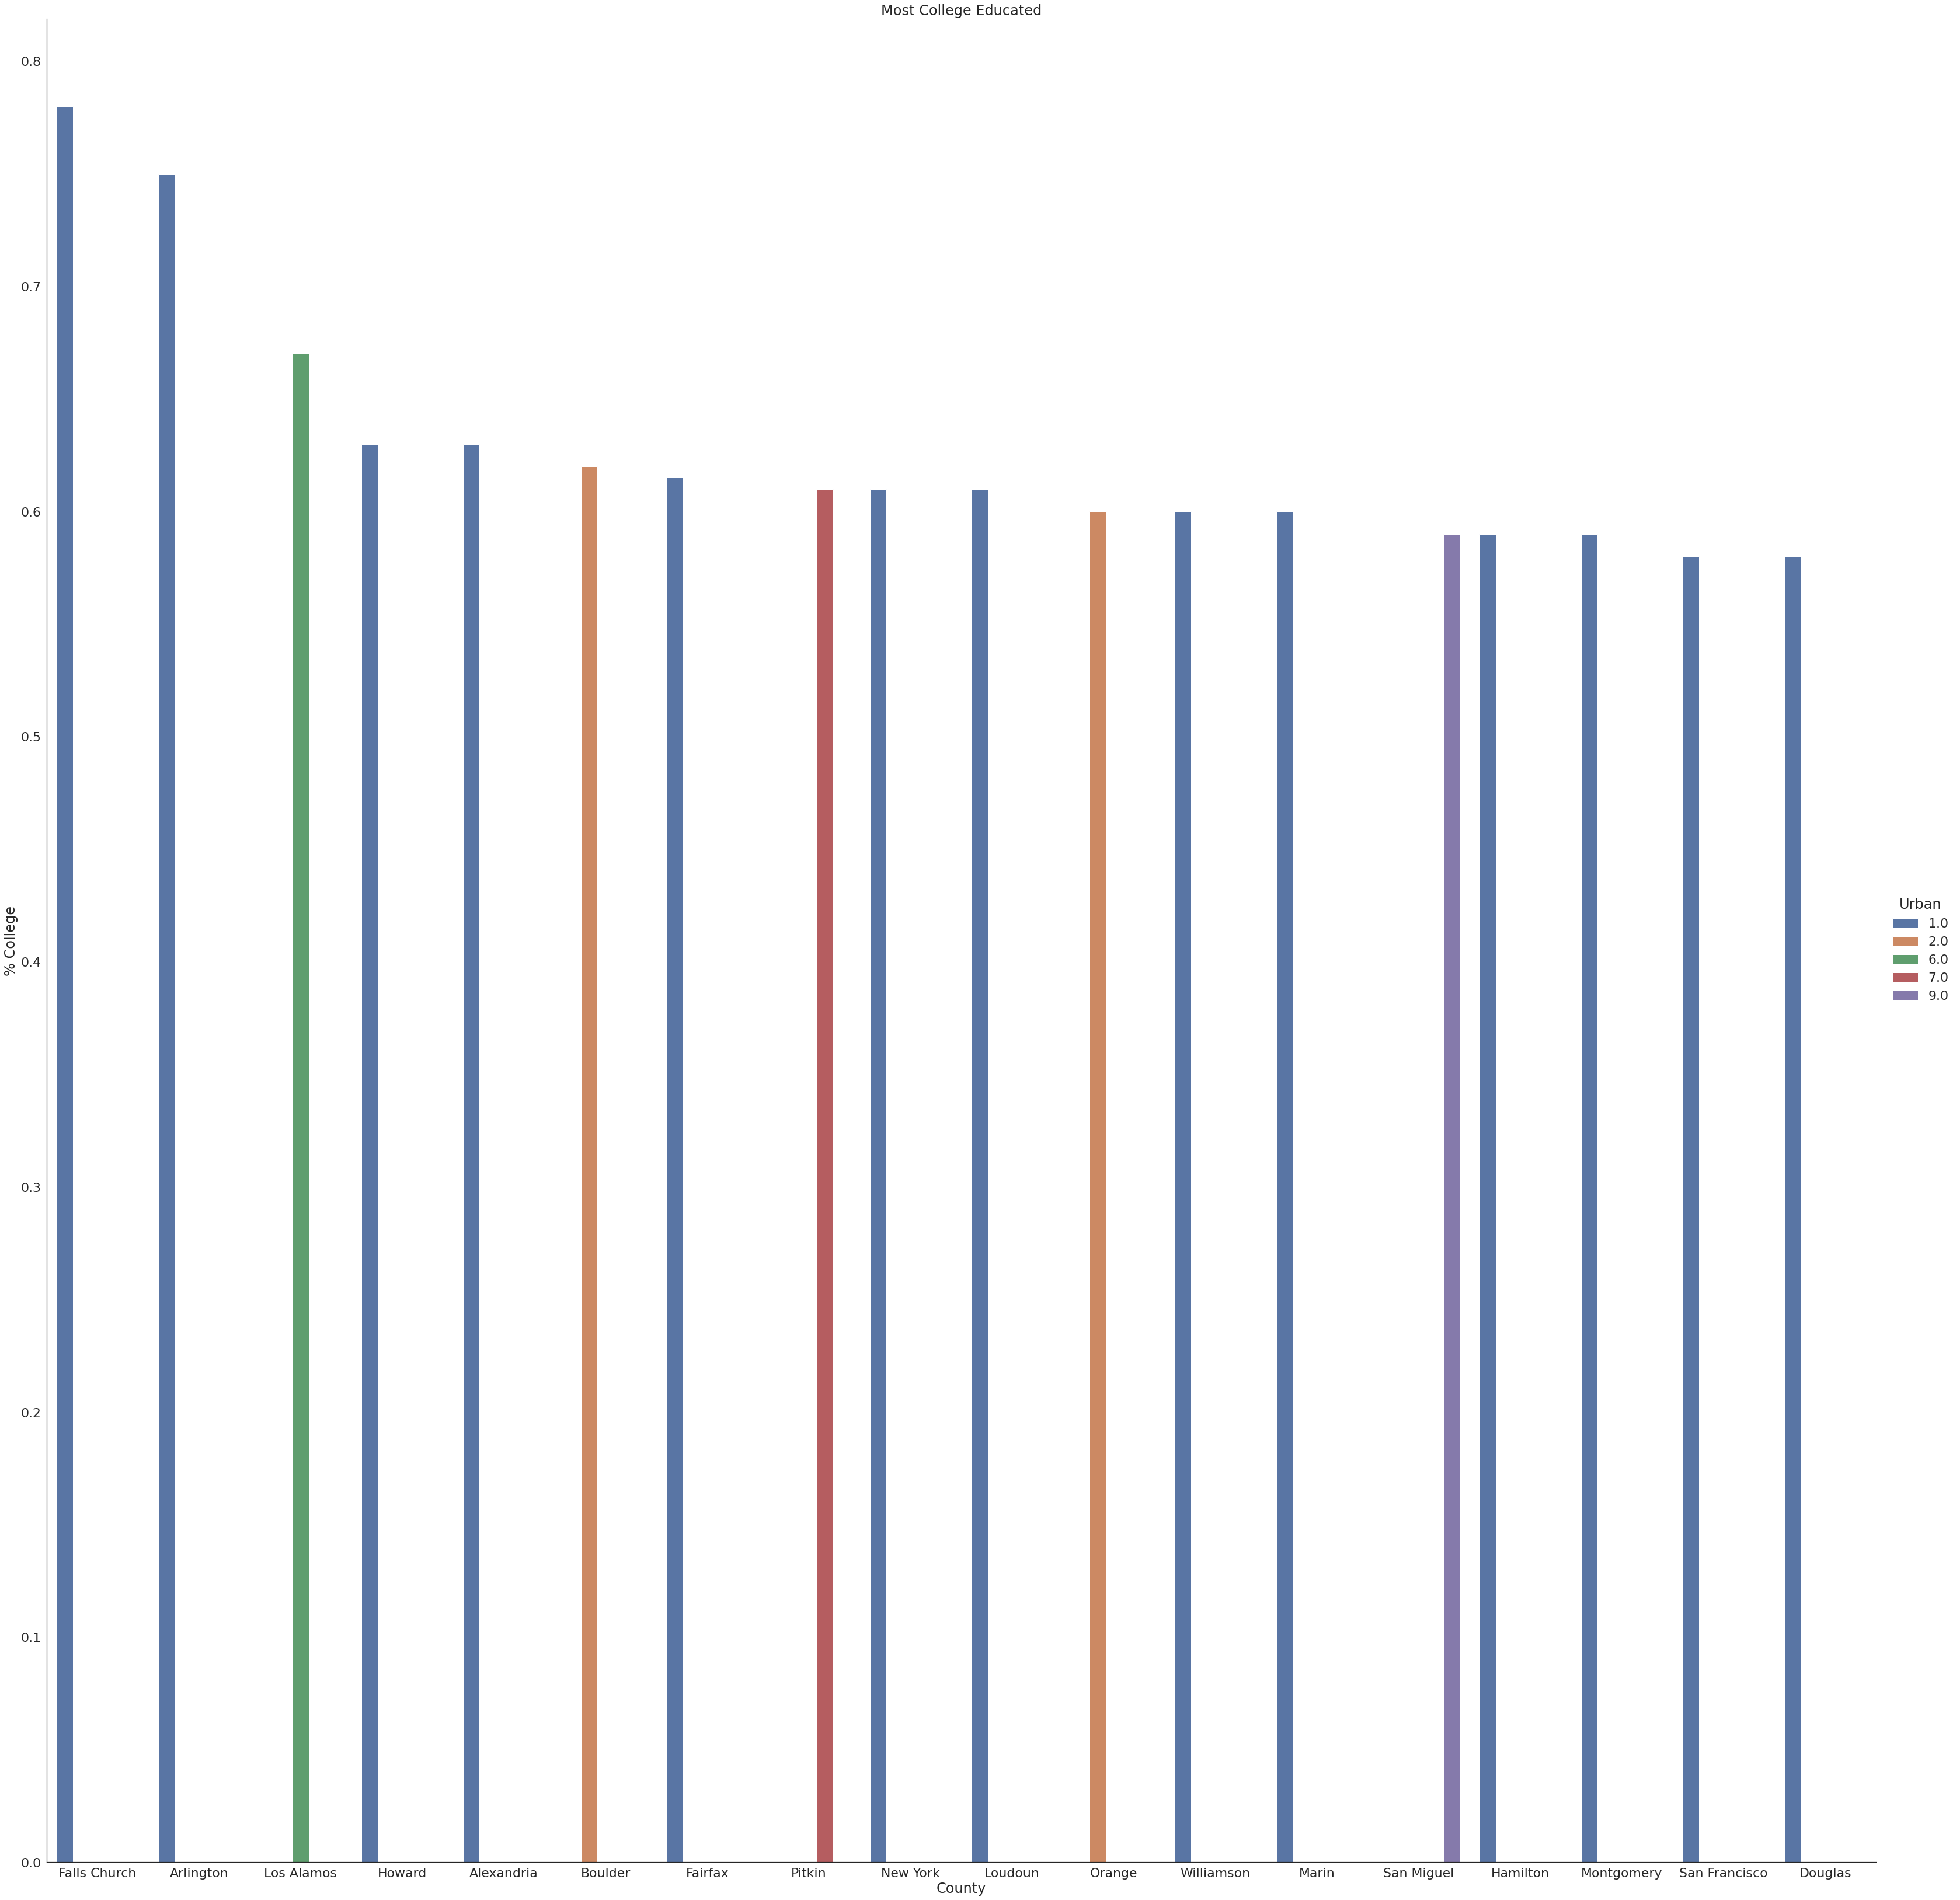

In [9]:
df = education.sort_values(by=['2019'],ascending=False)
df = df[df['2019']>=.58]
part = df['County'].unique().tolist()
g = sns.catplot(
    data=df, kind="bar",
    x="County", y="2019",height=45,hue = 'Urban', ci = None)
plt.ylabel("% College")
plt.title("Most College Educated")


Text(0.5, 1.0, 'College Education Distribution')

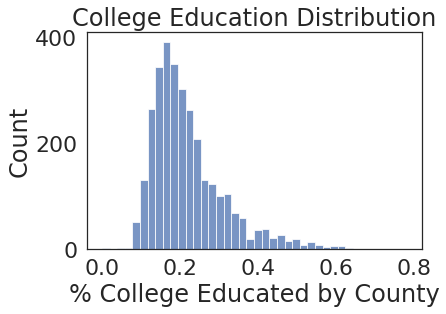

In [10]:
p = sns.histplot(x="2019",data =education,bins = 40)
plt.xlabel("% College Educated by County")
p.set_title("College Education Distribution")


Text(0.5, 1.0, '% College by Urban Index')

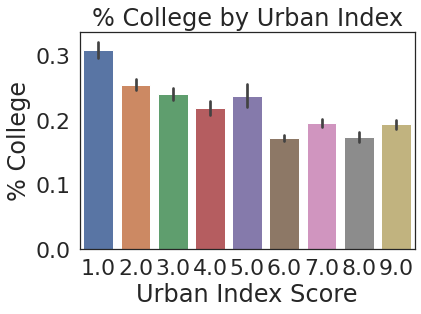

In [11]:
p= sns.barplot(x="Urban",y="2019",data = education)
p.set_xlabel("Urban Index Score")
p.set_ylabel("% College")
p.set_title("% College by Urban Index")

Text(0.5, 1.0, 'College Education Trends')

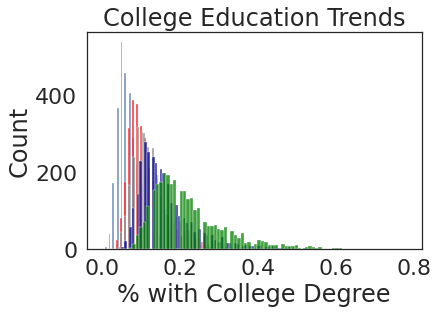

In [12]:
sns.histplot(x="1970",data = education,bins =90)
sns.histplot(data=education, x="1980",bins = 90, color="red")
sns.histplot(data=education, x="1990",bins = 90, color="grey")
sns.histplot(data=education, x="2000",bins = 90, color="darkblue")
sns.histplot(data=education, x="2019",bins = 90, color="green")
plt.xlabel("% with College Degree")
plt.ylabel("Count")
plt.title("College Education Trends")

In [13]:
t_val,p_val = ttest_ind(education['2019'],education['Urban'])

In [14]:
t_val, p_val

(nan, nan)

In [15]:
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is NOT a significant difference!


In [16]:
education = education.rename(columns={'2019':'year'})
dependent, predictors = patsy.dmatrices('year ~ Urban',education)
model = sm.OLS(dependent,predictors)
res_1 = model.fit()


In [17]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     625.3
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          5.32e-126
Time:                        11:54:38   Log-Likelihood:                 3206.3
No. Observations:                3141   AIC:                            -6409.
Df Residuals:                    3139   BIC:                            -6396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2920      0.003     89.224      0.0

In [18]:
df2 = df2.rename(columns={'2019':'year'})
dependent2, predictors2 = patsy.dmatrices('year ~ Urban',df2)
model2 = sm.OLS(dependent2,predictors2)
res_2 = model2.fit()


In [19]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     430.2
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           1.30e-81
Time:                        11:54:38   Log-Likelihood:                 1292.1
No. Observations:                1170   AIC:                            -2580.
Df Residuals:                    1168   BIC:                            -2570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3044      0.005     64.018      0.0